In [18]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
plt.style.use('seaborn-whitegrid')

### Correlation

Text(0, 0.5, 'Apparent velocity (km/s)')

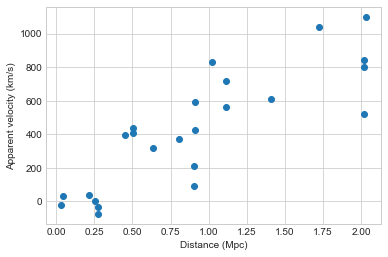

In [2]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503,
               0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41,
               1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0,
               93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3,
               840.0, 801.0, 519.0])

N = len(Xs)

plt.scatter(Xs, Ys)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Apparent velocity (km/s)')

In [3]:
sample_mean_x = np.mean(Xs)
sample_mean_y = np.mean(Ys)

print('barX={}, barY={}'.format(round(sample_mean_x, 3), round(sample_mean_y, 3)))

sample_covariance = np.cov(Xs, Ys)
print('cov(X, Y)=', round(sample_covariance[0][1], 3))

sample_correlation = np.corrcoef(Xs, Ys)[0][1]
print('corr(X, Y)', round(sample_correlation, 3))

barX=0.92, barY=425.618
cov(X, Y)= 191.207
corr(X, Y) 0.839


### Regression

In [7]:
s_X = np.sqrt(np.var(Xs))
s_Y = np.sqrt(np.var(Ys))

beta_1_hat = (sample_correlation * (s_Y / s_X))
beta_0_hat = (sample_mean_y - beta_1_hat * sample_mean_x)

print('hat{beta_1}=', round(beta_1_hat, 3))
print('hat{beta_0}=', round(beta_0_hat, 3))

hat{beta_1}= 447.871
hat{beta_0}= 13.61


In [8]:
model = lambda x: beta_0_hat + beta_1_hat * x

predictions = [model(x) for x in Xs]

SSR = np.sum((predictions - Ys)**2)
SST = np.sum((Ys - sample_mean_y)**2)

R_2 = 1 - (SSR / SST)
print('R^2=', R_2)
print('rho^2=', sample_correlation ** 2)

R^2= 0.7041557990122809
rho^2= 0.7041557990122808


[0.22041215341455975, 0.29855200737691545, 0.31160152021167503, 0.259434913481877, 0.19871537303869438, 0.12922278661744446, 0.876503925215184, 0.8890817689113378, 0.9362486827719148, 0.7538699491776841, 0.8371981636647033, 0.3983886417151365, 0.580924598355569, 0.9158096867656648, 1.184661095770953, 1.5541352543454718, 1.3796176730613374, 1.1327774905243184, 1.2066723222392222, 1.885875881831529, 1.9802097095526827, 1.5714297894276834, 1.5101128014089333, 1.0667438111195109]


Text(0, 0.5, 'Distance (Mpc)')

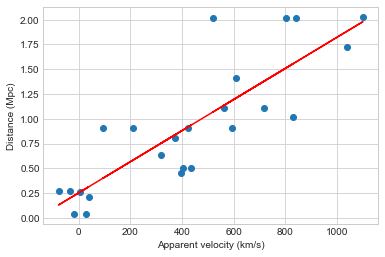

In [15]:
## What if we want to model X(Y_i) = alpha_0 + alpha_1 * Y_i ?

## What about the coefficients alpha_0 and alpha_1 ?
alpha_1_hat = sample_correlation * (s_X / s_Y)
alpha_0_hat = sample_mean_x - alpha_1_hat * sample_mean_y

model = lambda y: alpha_0_hat + alpha_1_hat * y
predictions_X = [model(y) for y in Ys]
print(predictions_X)

# Now the axis are inverted
plt.scatter(Ys, Xs)
plt.plot(Ys, predictions_X, color='r')
plt.xlabel('Apparent velocity (km/s)')
plt.ylabel('Distance (Mpc)')

### Non-linear relationships

rho_XY = 0.99


Text(0.5, 1.0, 'Solar system planets \n$R^2$ = 0.978')

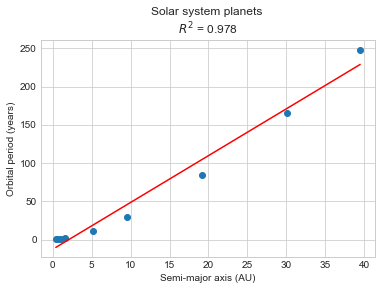

In [54]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])
Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])
N = len(Xs)

X_bar = np.mean(Xs)
Y_bar = np.mean(Ys)
s_X = np.sqrt(np.var(Xs))
s_Y = np.sqrt(np.var(Ys))

sample_correlation = np.corrcoef(Xs, Ys)[0][1]
print('rho_XY =', round(sample_correlation, 2))

beta_1_hat = sample_correlation * (s_Y / s_X)
beta_0_hat = Y_bar - beta_1_hat * X_bar

model  = lambda x: beta_0_hat + beta_1_hat * x
predictions = [model(x) for x in Xs]

plt.scatter(Xs, Ys)
plt.plot(Xs, predictions, color='r')
plt.xlabel('Semi-major axis (AU)')
plt.ylabel('Orbital period (years)')
plt.title('Solar system planets \n$R^2$ = {}'.format(round(sample_correlation**2, 3)))

Text(0, 0.5, 'residuals')

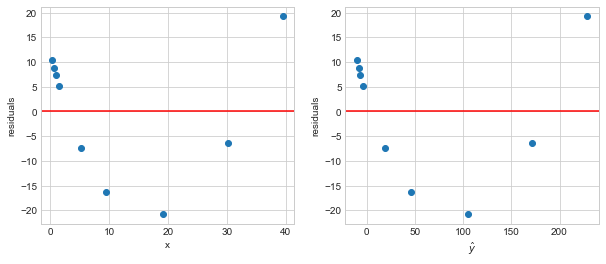

In [41]:
# Plot residuals to ensure the relationship is linear
residuals = Ys - predictions

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(Xs, residuals)
ax[0].axhline(0, color='r')
ax[0].set_xlabel('x')
ax[0].set_ylabel('residuals')

ax[1].scatter(predictions, residuals)
ax[1].axhline(0, color='r')
ax[1].set_xlabel('$\hat{y}$')
ax[1].set_ylabel('residuals')

### QQ-plot

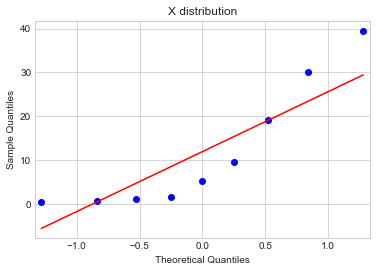

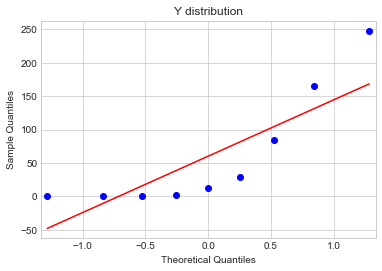

In [39]:
sm.qqplot(Xs, line='s')
plt.title('X distribution')
plt.show()

sm.qqplot(Ys, line='s')
plt.title('Y distribution')
plt.show()


kappa=1.5, ln(omega)=0.001


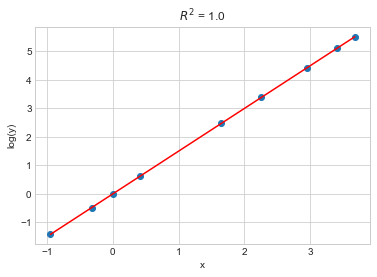

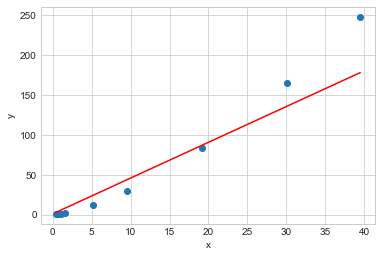

In [73]:
# Let's try different transformations and see their goodness of fit
Ys_tranformed = np.log(Ys)
# Ys_tranformed = np.power(Ys, 2)
Xs_tranformed = np.log(Xs)

# s_corr_transformed = np.corrcoef(Xs, Ys_tranformed)[0][1]
# s_corr_transformed = np.corrcoef(Xs_tranformed, Ys)[0][1]
s_corr_transformed = np.corrcoef(Xs_tranformed, Ys_tranformed)[0][1]
s_X = np.sqrt(np.var(Xs_tranformed))
s_Y = np.sqrt(np.var(Ys_tranformed))

# plt.scatter(Xs, Ys_tranformed)
# plt.scatter(Xs_tranformed, Ys)

kappa = s_corr_transformed * (s_Y / s_X)
omega = np.mean(Ys_tranformed) - kappa * np.mean(Xs_tranformed)
print('kappa={}, ln(omega)={}'.format(round(kappa, 2), round(omega, 3)))

model_transformed = lambda x: omega + kappa * x
predictions = [model_transformed(x) for x in Xs_tranformed]

plt.scatter(Xs_tranformed, Ys_tranformed)
plt.plot(Xs_tranformed, predictions, color='r')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.title('$R^2$ = {}'.format(round(s_corr_transformed ** 2, 3)))
plt.show()

model = lambda x: np.exp(omega) + np.exp(kappa) * x
predictions = [model(x) for x in Xs]

plt.scatter(Xs, Ys)
plt.plot(Xs, predictions, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Multiple Linear Regression

In [2]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = len(LogPlanetMass)


In [23]:
Y = LogPlanetMass
X = np.array([np.ones(N), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge]).T
columns = ['Intercept', 'LogPlanetRadius', 'LogPlanetOrbit', 'StarMetallicity', 'LogStarMass', 'LogStarAge']

# print('Y (dim{}): {}'.format(Y.shape, Y))
# print('X(dim{}): {}'.format(X.shape, X))

beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)
print('beta_hat ({}) = {}'.format(beta_hat.shape, np.round(beta_hat, 3)))

beta_hat ((6,)) = [ 0.154  1.402 -0.141 -1.6   -0.956 -0.462]


In [55]:
S = np.sum((Y - np.matmul(X, beta_hat))**2)
p = X.shape[1]
s_2 = S / (N - p)
var_beta_hat = s_2 * np.linalg.inv(np.matmul(X.T, X))
var_beta_i = var_beta_hat.diagonal()

T = [(beta_hat[i] / np.sqrt(s_2 * var_beta_i[i])) for i in range(p)]

p_values = t.sf(np.abs(T), (N-p))
print(np.round(p_values, 3))

sorted_p_values = np.argsort(p_values)
most_significant = sorted_p_values[0]

# print(sorted_p_values)
print('Variables ordered by significance:\n', np.asarray(columns)[sorted_p_values])

[0.46  0.    0.362 0.128 0.222 0.135]
Variables ordered by significance:
 ['LogPlanetRadius' 'StarMetallicity' 'LogStarAge' 'LogStarMass'
 'LogPlanetOrbit' 'Intercept']
